In [1]:
import numpy as np
import pandas as pd
import os
from SimpleCycleReservoir import SimpleCycleReservoir
import matplotlib.pyplot as plt
import japanize_matplotlib
from sklearn.metrics import mean_squared_error as MSE
import random
from signalz import mackey_glass
from tqdm import tqdm
import statistics

### エノン写像

In [2]:
data = pd.read_csv(os.path.join('Henon_Map_time_series_ex1.csv'))
data.head()

,Unnamed: 0,values
0,0,-11.97463
1,1,-11.97463
2,2,-3.96319
3,3,-9.83426
4,4,-1.07770


In [3]:
train_inputs = data['values'][:1000]
train_target = data['values'][1:1001]
test_data = data['values'][1000:].reset_index(drop=True)

### mackey_glass

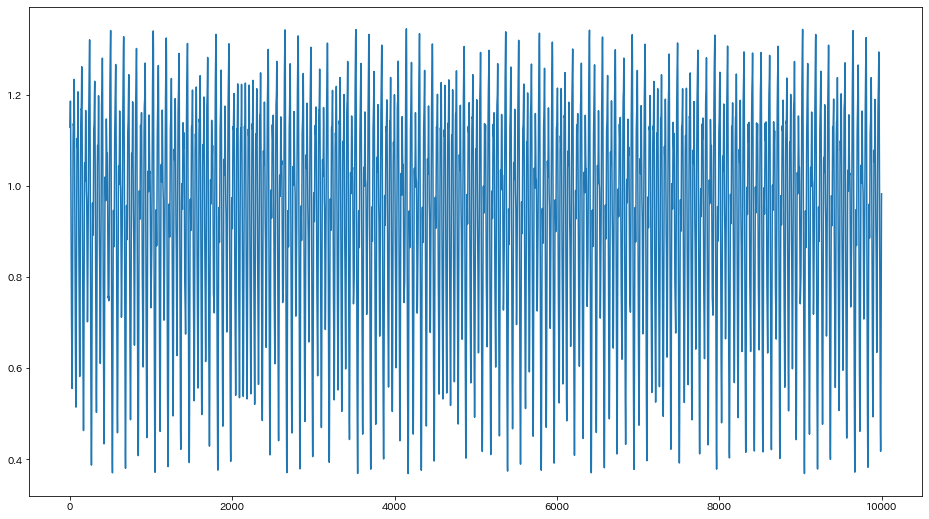

In [4]:
mg = mackey_glass(10200, a=0.2, b=1, c=0.9, d=17, e=10, initial=0.1)
plt.figure(figsize=(16,9))
plt.plot(mg[200:])

In [5]:
train_inputs = mg[200:1200]
train_target = mg[201:1201]
test_data = mg[1200:5200]

### モデル構築

In [6]:
#２層
NUM_INPUT_NODES = 1
NUM_RESERVOIR_LAYER = 2
NUM_RESERVOIR_NODES = 75
NUM_OUTPUT_NODES = 1
NUM_EPOCH = 1000
LEAK_RATE = 0.30934
LAMBDA =  3.000000e-12

In [7]:
rmse = []
for num in tqdm(range(100)):
    model = SimpleCycleReservoir(train_inputs, train_target, 
                                 NUM_RESERVOIR_LAYER, NUM_INPUT_NODES,
                                 NUM_RESERVOIR_NODES, NUM_OUTPUT_NODES,
                                 LEAK_RATE, LAMBDA, NUM_EPOCH ,random_connect=True)
    model.train()
    predict_result = model.predict(test_data)
    RMSE = np.sqrt(MSE(test_data[1:], predict_result[:-1]))
    rmse.append(RMSE)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [43:03<00:00, 25.83s/it]


In [9]:
ave = sum(rmse)/len(rmse)
print('平均値',ave)
dev = statistics.pstdev(rmse)
print('標準偏差',dev)

平均値 0.04293631655019114
標準偏差 0.007325115519343399
